---
### **SUMARRY**
---

> This project analyzes drilling mud log data from well 16A78-32 to identify factors affecting the Rate of Penetration (ROP) and uncover anomalies that may reduce efficiency. The study finds that ROP is strongly and negatively correlated with Weight on Bit (WOB), outlet mud temperature, CO₂ concentration, and pump pressure, while RPM and pump strokes per minute (SPM1) show weaker positive correlations. Using statistical analysis, anomaly detection, and visualization techniques, we identify operational “sweet spots” where ROP is maximized, and highlight conditions that suggest potential bit wear, hard formations, or hydraulic inefficiencies. The insights guide actionable recommendations to optimize drilling performance, reduce non-productive time, and lower costs.


## **DATASET**

\https://catalog.data.gov/dataset/utah-forge-well-16a78-32-drilling-data-868c2

### **Problem Statement**

> Drilling operations often suffer from reduced ROP due to suboptimal parameter settings, formation variability, or equipment wear. Without data-driven insights, teams risk inefficient drilling, higher costs, and delays. This analysis aims to quantify relationships between drilling parameters and ROP, detect anomalies, and provide recommendations for parameter optimization.



---
### **METHODOLOGY**

---



>  **Data Preparation**




In [93]:
# Install lasio library to read .las files
!pip install lasio

In [95]:
import lasio
import pandas as pd

# Load the .las file
mud_log = '/content/Mud Log 16A78-32.las'
las_data = lasio.read(mud_log)

# Convert to pandas DataFrame for easier manipulation
df = las_data.df()

# Display the first few rows of the DataFrame
display(df.head())

,MUDL_ROP,MUDL_WOB,MUDL_CO2,MUDL_TEMPIN,MUDL_TEMPOUT,MUDL_PP,MUDL_SPM1,MUDL_SPM2,MUDL_SPM3,MUDL_FLOWIN,MUDL_FLOWOUT,MUDL_GAINLOSS,MUDL_RPM,MUDL_TORQUE,MUDL_PITVOL
DEPTH,,,,,,,,,,,,,,,
130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,34.0,1959.0,466.0
131.0,69.0,20.0,439.0,60.0,67.0,419.0,97.0,0.0,0.0,370.0,48.0,15.0,32.0,2496.0,465.0
132.0,78.0,19.0,500.0,60.0,68.0,227.0,97.0,0.0,0.0,373.0,49.0,16.0,33.0,434.0,466.0
133.0,57.0,20.0,500.0,60.0,68.0,293.0,96.0,0.0,0.0,375.0,51.0,17.0,33.0,2030.0,467.0
134.0,69.0,18.0,484.0,60.0,68.0,285.0,95.0,0.0,0.0,378.0,50.0,17.0,32.0,1388.0,467.0


In [34]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
MUDL_ROP,10858.0,107.486185,134.512060,0.0,33.25,60.0,118.0,888.0
MUDL_WOB,10858.0,33.338552,21.090015,-1368.0,21.00,39.0,45.0,73.0
MUDL_CO2,10858.0,1159.994566,406.294790,0.0,752.00,1245.0,1462.0,3772.0
MUDL_TEMPIN,10858.0,115.603702,24.778897,0.0,94.00,123.0,137.0,160.0
MUDL_TEMPOUT,10858.0,131.220575,23.927308,0.0,120.00,138.0,150.0,165.0
MUDL_PP,10858.0,2667.595045,991.257984,0.0,1891.00,2660.5,3448.0,4649.0
MUDL_SPM1,10858.0,49.256861,40.435661,0.0,0.00,68.0,87.0,129.0
MUDL_SPM2,10858.0,36.618162,37.387664,0.0,0.00,0.0,75.0,96.0
MUDL_SPM3,10858.0,64.573770,32.023883,0.0,67.00,76.0,86.0,121.0
MUDL_FLOWIN,10858.0,629.878154,119.902238,0.0,573.00,648.0,721.0,993.0


In [8]:
# Display the data types of each column
print("Data types:")
display(df.dtypes)

# Calculate and display the number of missing values for each column
print("\nMissing values:")
display(df.isnull().sum())

# Display descriptive statistics for the numerical columns
print("\nDescriptive statistics:")
display(df.describe())

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows:")
display(df.head())

Data types:


,0
MUDL_ROP,float64
MUDL_WOB,float64
MUDL_CO2,float64
MUDL_TEMPIN,float64
MUDL_TEMPOUT,float64
MUDL_PP,float64
MUDL_SPM1,float64
MUDL_SPM2,float64
MUDL_SPM3,float64
MUDL_FLOWIN,float64



Missing values:


,0
MUDL_ROP,0
MUDL_WOB,0
MUDL_CO2,0
MUDL_TEMPIN,0
MUDL_TEMPOUT,0
MUDL_PP,0
MUDL_SPM1,0
MUDL_SPM2,0
MUDL_SPM3,0
MUDL_FLOWIN,0



Descriptive statistics:


,MUDL_ROP,MUDL_WOB,MUDL_CO2,MUDL_TEMPIN,MUDL_TEMPOUT,MUDL_PP,MUDL_SPM1,MUDL_SPM2,MUDL_SPM3,MUDL_FLOWIN,MUDL_FLOWOUT,MUDL_GAINLOSS,MUDL_RPM,MUDL_TORQUE,MUDL_PITVOL
count,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000
mean,107.486185,33.338552,1159.994566,115.603702,131.220575,2667.595045,49.256861,36.618162,64.573770,629.878154,60.834132,10.011789,46.681525,5141.033800,310.303279
std,134.512060,21.090015,406.294790,24.778897,23.927308,991.257984,40.435661,37.387664,32.023883,119.902238,17.517928,38.339897,25.059580,4166.395094,222.396654
min,0.000000,-1368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-172.000000,0.000000,0.000000,0.000000
25%,33.250000,21.000000,752.000000,94.000000,120.000000,1891.000000,0.000000,0.000000,67.000000,573.000000,58.000000,0.000000,39.000000,2015.250000,0.000000
50%,60.000000,39.000000,1245.000000,123.000000,138.000000,2660.500000,68.000000,0.000000,76.000000,648.000000,60.000000,0.000000,50.000000,4249.000000,440.000000
75%,118.000000,45.000000,1462.000000,137.000000,150.000000,3448.000000,87.000000,75.000000,86.000000,721.000000,74.000000,28.000000,69.000000,8042.500000,478.000000
max,888.000000,73.000000,3772.000000,160.000000,165.000000,4649.000000,129.000000,96.000000,121.000000,993.000000,85.000000,148.000000,98.000000,15082.000000,598.000000



First 5 rows:


,MUDL_ROP,MUDL_WOB,MUDL_CO2,MUDL_TEMPIN,MUDL_TEMPOUT,MUDL_PP,MUDL_SPM1,MUDL_SPM2,MUDL_SPM3,MUDL_FLOWIN,MUDL_FLOWOUT,MUDL_GAINLOSS,MUDL_RPM,MUDL_TORQUE,MUDL_PITVOL
DEPTH,,,,,,,,,,,,,,,
130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,34.0,1959.0,466.0
131.0,69.0,20.0,439.0,60.0,67.0,419.0,97.0,0.0,0.0,370.0,48.0,15.0,32.0,2496.0,465.0
132.0,78.0,19.0,500.0,60.0,68.0,227.0,97.0,0.0,0.0,373.0,49.0,16.0,33.0,434.0,466.0
133.0,57.0,20.0,500.0,60.0,68.0,293.0,96.0,0.0,0.0,375.0,51.0,17.0,33.0,2030.0,467.0
134.0,69.0,18.0,484.0,60.0,68.0,285.0,95.0,0.0,0.0,378.0,50.0,17.0,32.0,1388.0,467.0


In [9]:
# Calculate Q1, Q3, and IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = {}
for col in df.columns:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])].shape[0]

print("Number of outliers per column:")
display(outliers)

# Decide on a strategy: Capping outliers to the bounds
df_cleaned = df.copy()
for col in df_cleaned.columns:
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print("\nFirst 5 rows of DataFrame after capping outliers:")
display(df_cleaned.head())

Number of outliers per column:


{'MUDL_ROP': 1144,
 'MUDL_WOB': 1,
 'MUDL_CO2': 60,
 'MUDL_TEMPIN': 18,
 'MUDL_TEMPOUT': 453,
 'MUDL_PP': 0,
 'MUDL_SPM1': 0,
 'MUDL_SPM2': 0,
 'MUDL_SPM3': 2031,
 'MUDL_FLOWIN': 594,
 'MUDL_FLOWOUT': 710,
 'MUDL_GAINLOSS': 1623,
 'MUDL_RPM': 0,
 'MUDL_TORQUE': 0,
 'MUDL_PITVOL': 0}


First 5 rows of DataFrame after capping outliers:


,MUDL_ROP,MUDL_WOB,MUDL_CO2,MUDL_TEMPIN,MUDL_TEMPOUT,MUDL_PP,MUDL_SPM1,MUDL_SPM2,MUDL_SPM3,MUDL_FLOWIN,MUDL_FLOWOUT,MUDL_GAINLOSS,MUDL_RPM,MUDL_TORQUE,MUDL_PITVOL
DEPTH,,,,,,,,,,,,,,,
130.0,0.0,0.0,0.0,29.5,75.0,0.0,0.0,0.0,38.5,351.0,34.0,16.0,34.0,1959.0,466.0
131.0,69.0,20.0,439.0,60.0,75.0,419.0,97.0,0.0,38.5,370.0,48.0,15.0,32.0,2496.0,465.0
132.0,78.0,19.0,500.0,60.0,75.0,227.0,97.0,0.0,38.5,373.0,49.0,16.0,33.0,434.0,466.0
133.0,57.0,20.0,500.0,60.0,75.0,293.0,96.0,0.0,38.5,375.0,51.0,17.0,33.0,2030.0,467.0
134.0,69.0,18.0,484.0,60.0,75.0,285.0,95.0,0.0,38.5,378.0,50.0,17.0,32.0,1388.0,467.0


In [10]:
# Display the data types of each column in the df_cleaned DataFrame
display(df_cleaned.dtypes)

,0
MUDL_ROP,float64
MUDL_WOB,float64
MUDL_CO2,float64
MUDL_TEMPIN,float64
MUDL_TEMPOUT,float64
MUDL_PP,float64
MUDL_SPM1,float64
MUDL_SPM2,float64
MUDL_SPM3,float64
MUDL_FLOWIN,float64


### **Exploratory Data Analysis**




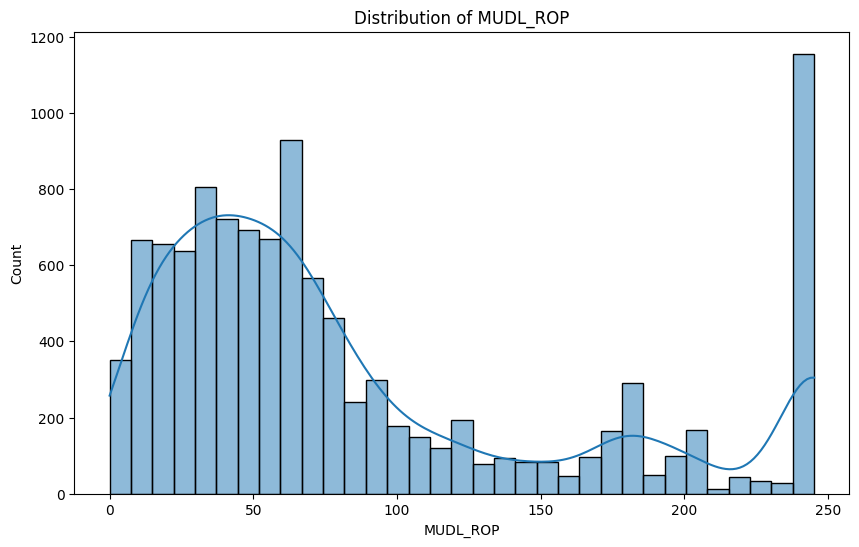

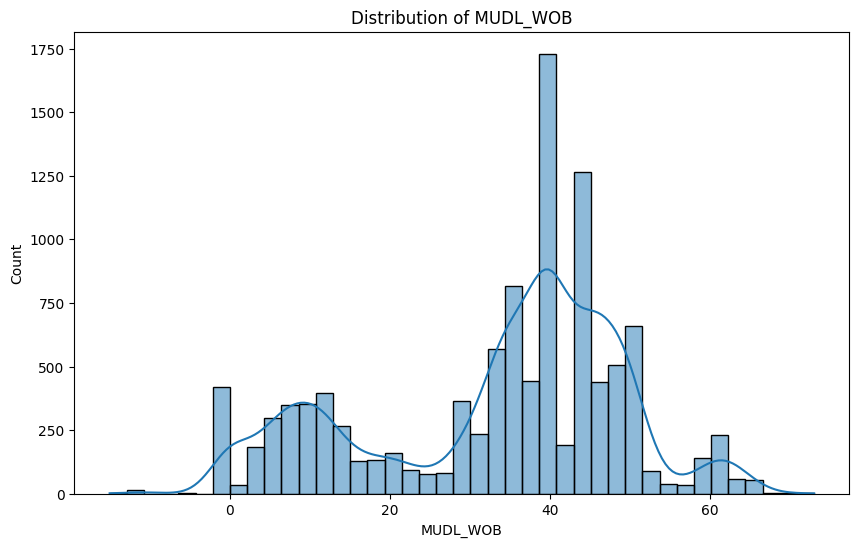

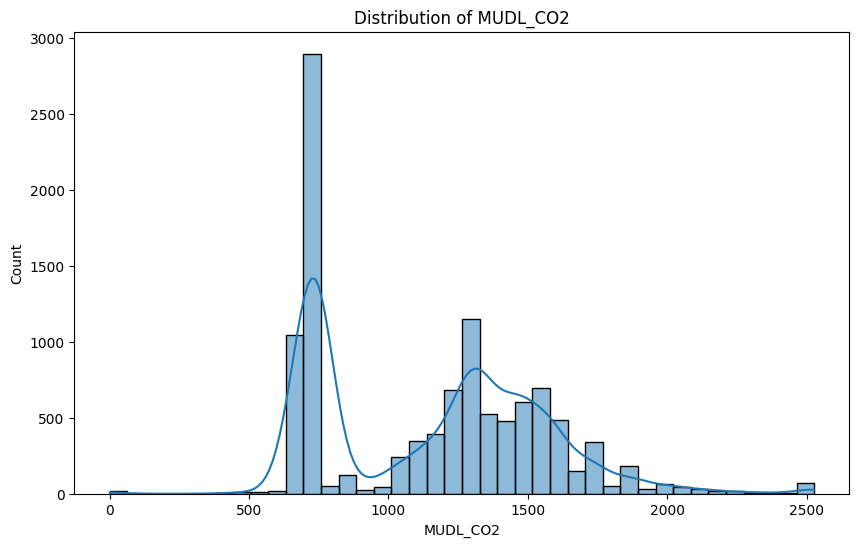

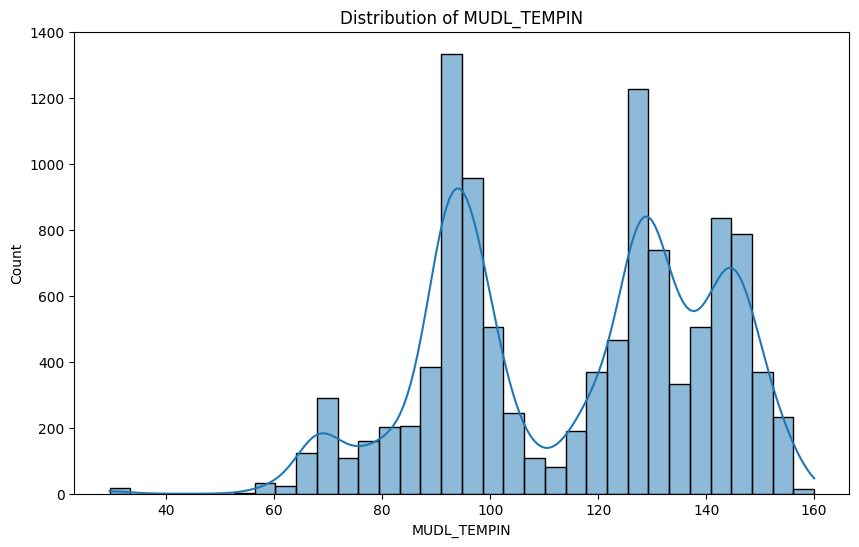

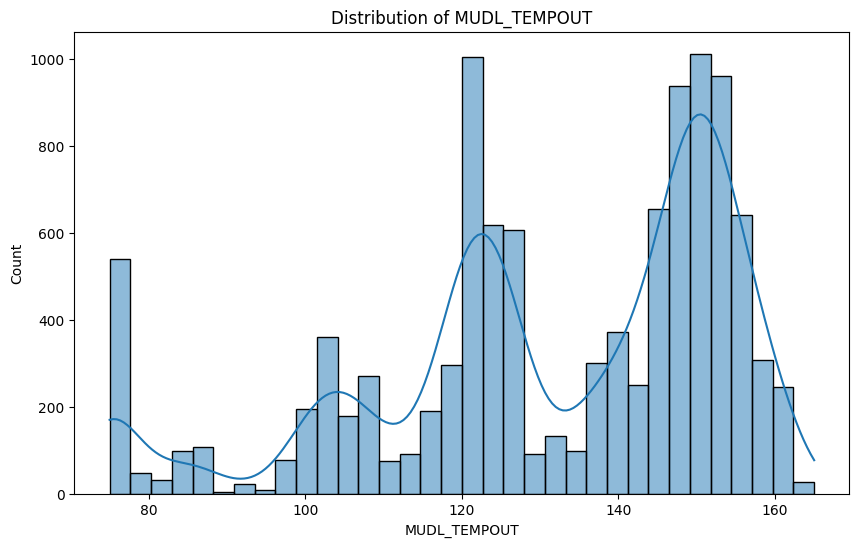

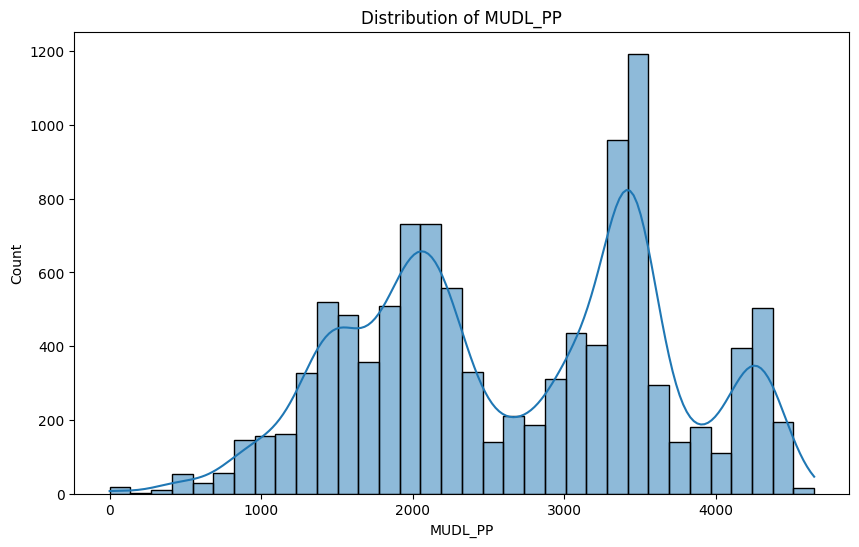

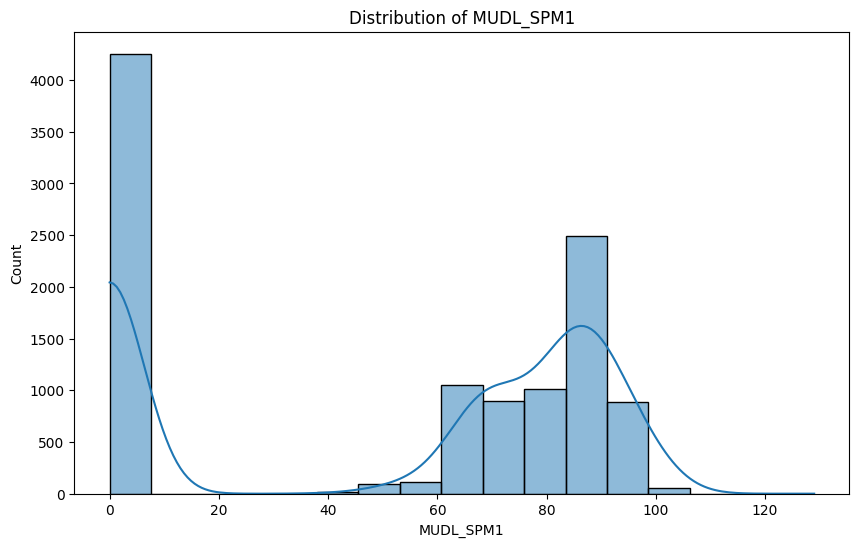

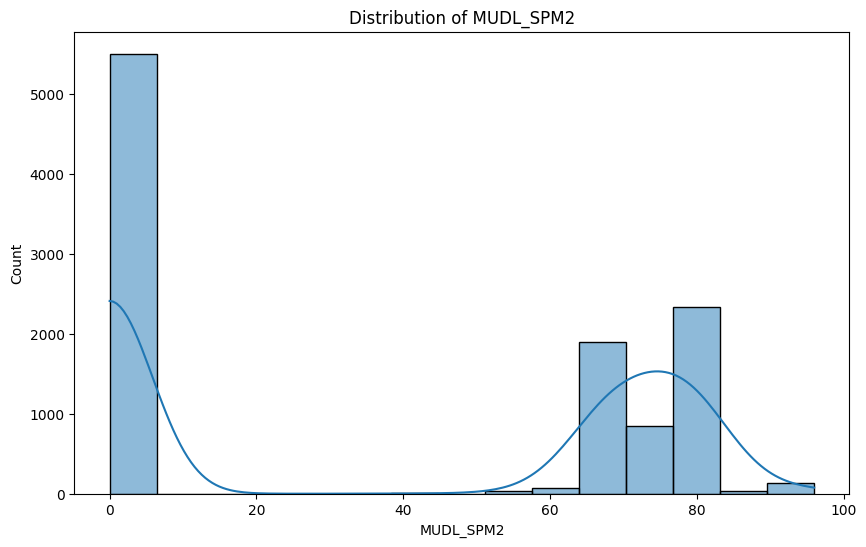

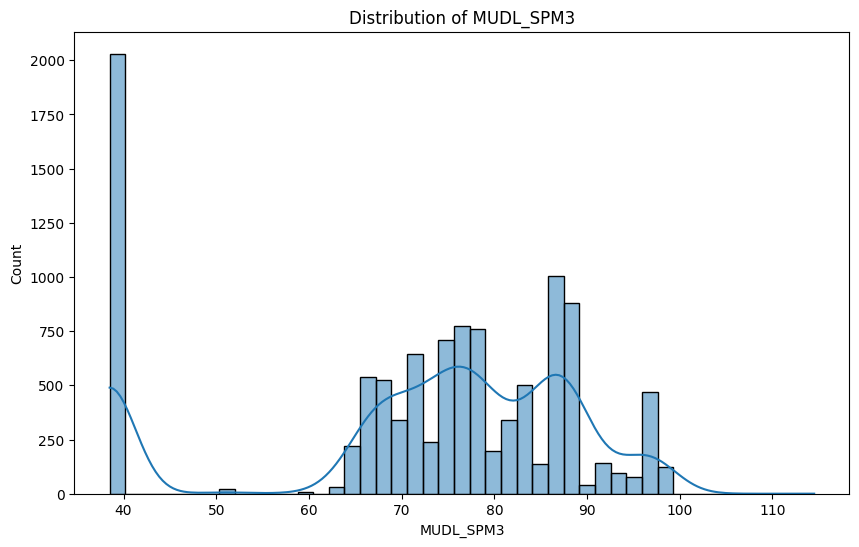

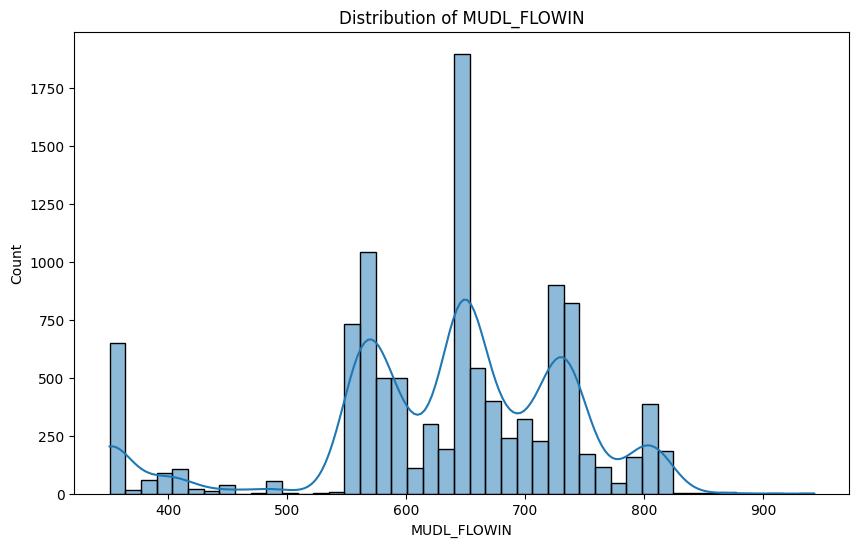

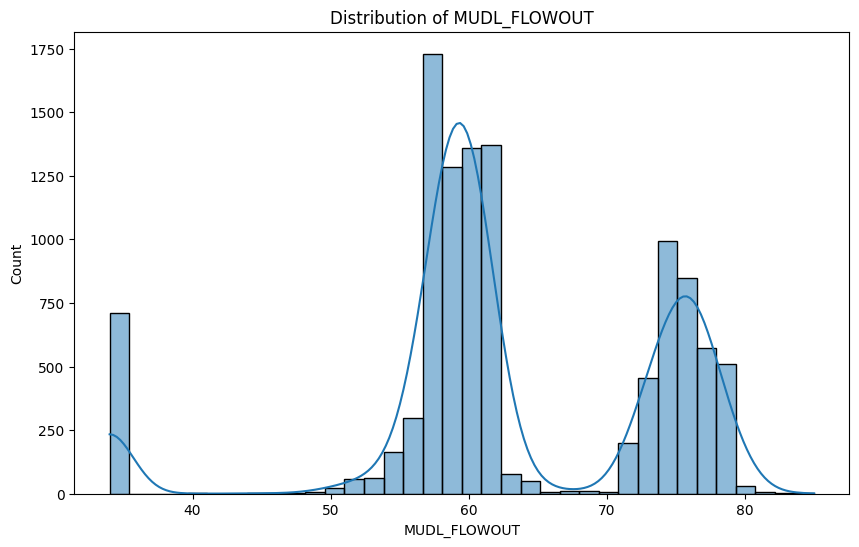

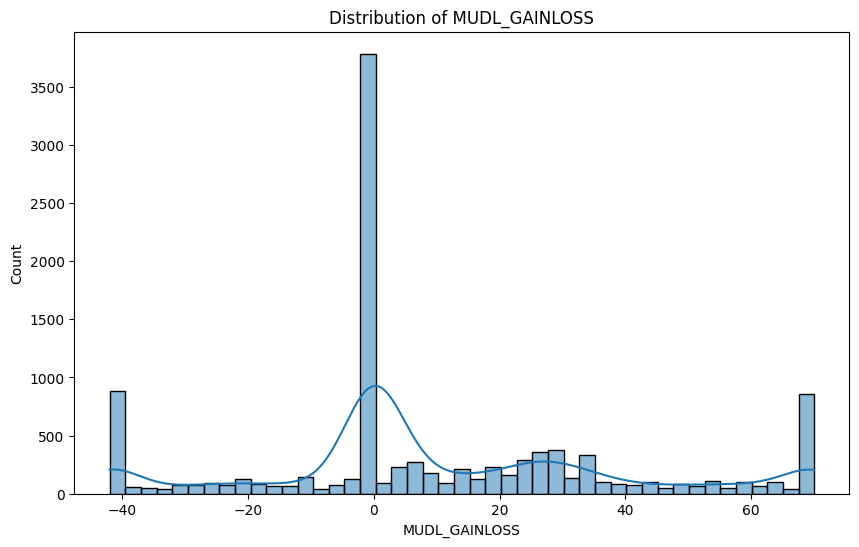

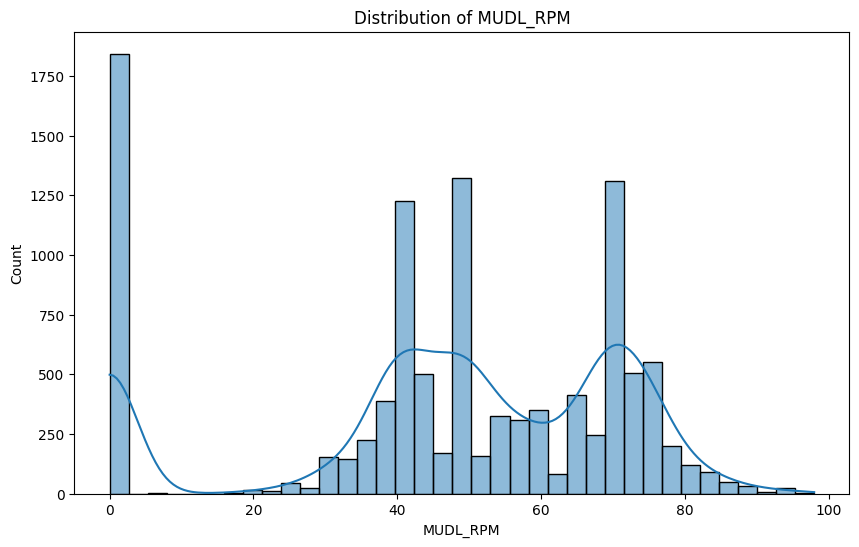

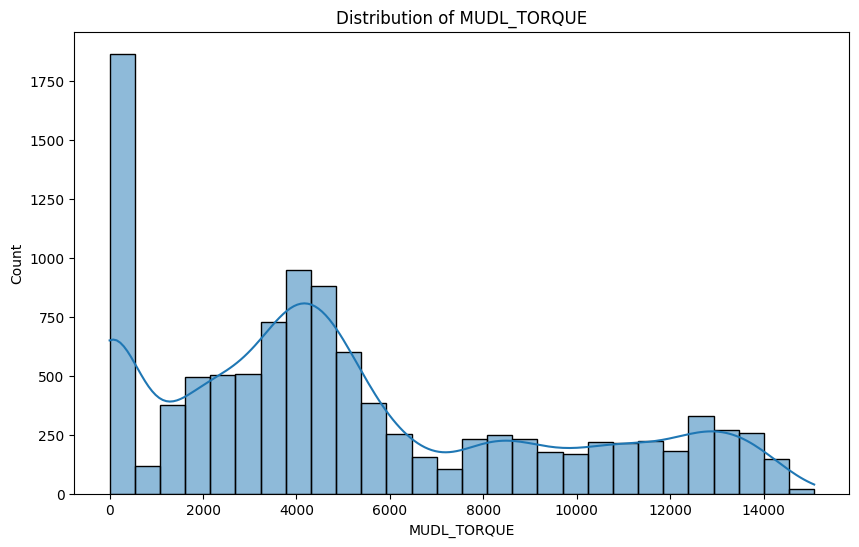

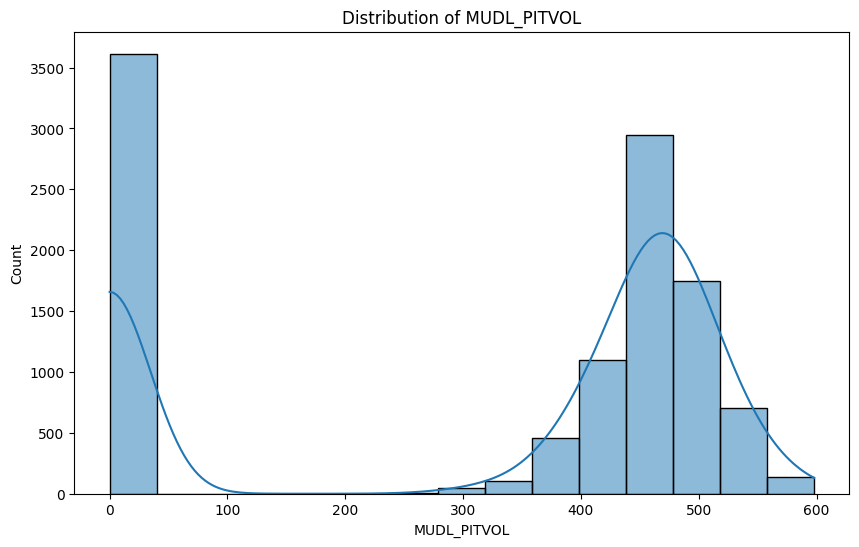

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

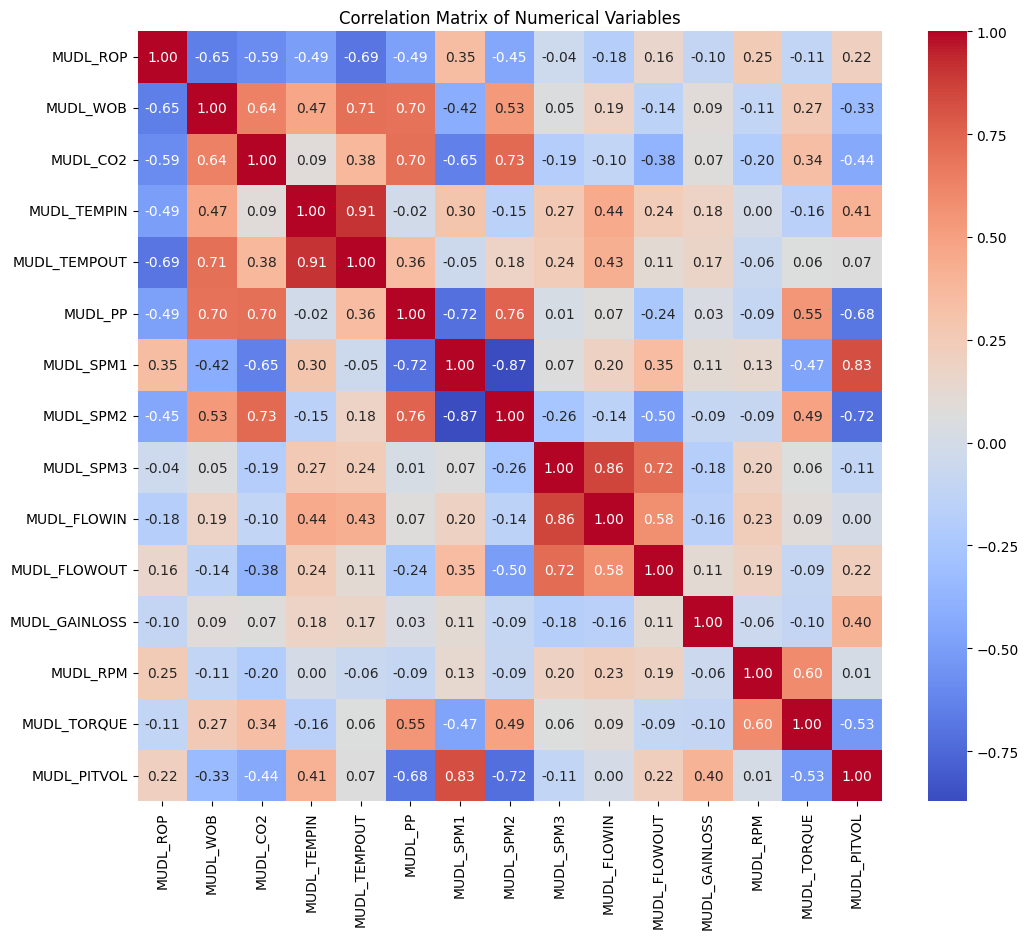

In [16]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix quantitatively shows how drilling parameters impact the Rate of Penetration (ROP), with strong negative correlations found in WOB (r = -0.65), mud temperature out (r = -0.69), CO₂ (r = -0.59), and pump pressure (r = -0.49), indicating that higher values of these factors generally slow drilling efficiency, while weaker positive correlations appear in SPM1 (r = 0.35) and RPM (r = 0.25), suggesting that increased pump strokes and rotary speed can slightly improve penetration; the overall goal of the figure is to provide a clear, data-driven overview of which parameters most strongly affect ROP, thereby guiding drilling teams to focus on reducing detrimental influences and optimizing controllable variables to achieve more efficient and cost-effective operations.

### **visualize ROP vs WOB & RPM**

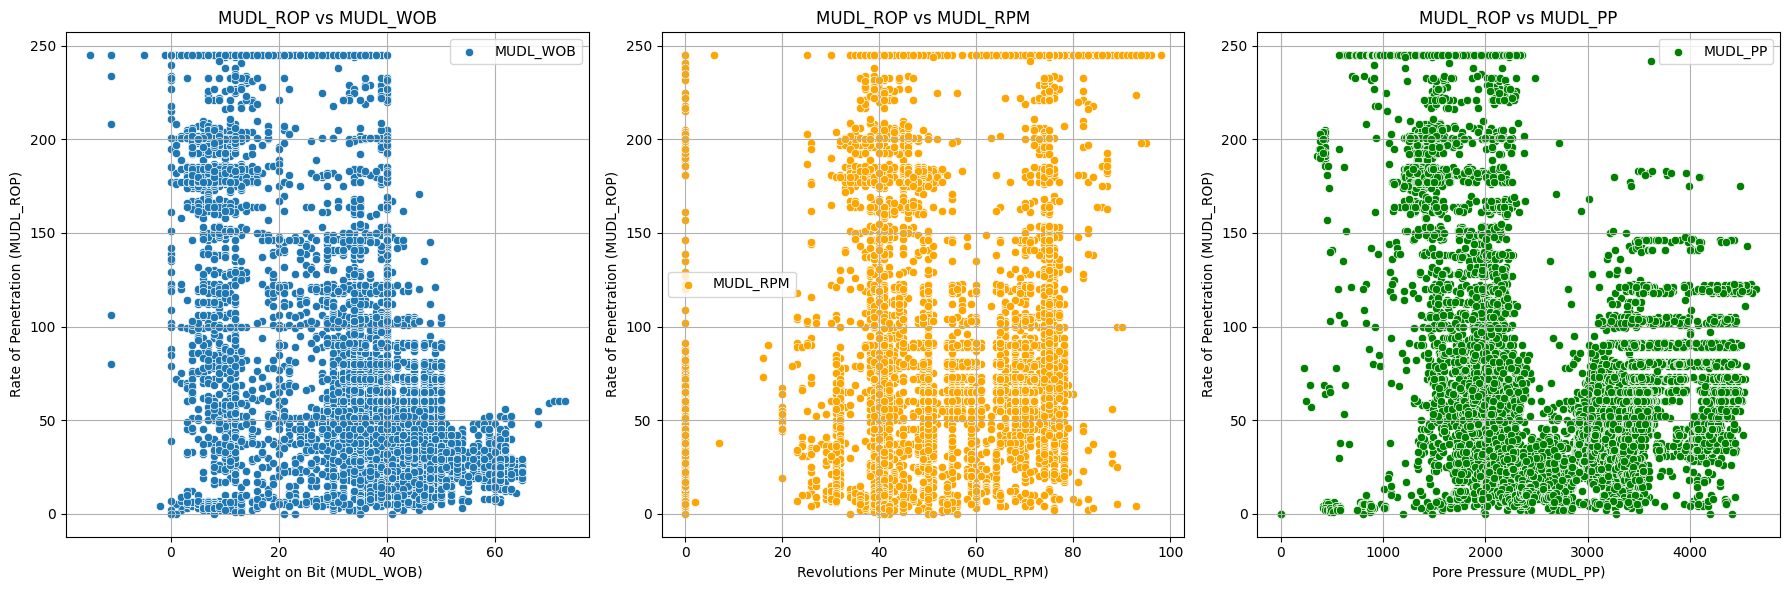

In [22]:
# Create scatter plots for MUDL_ROP vs MUDL_WOB, MUDL_RPM, and MUDL_PP in one figure

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Scatter plot for MUDL_ROP vs MUDL_WOB
sns.scatterplot(data=df_cleaned, x='MUDL_WOB', y='MUDL_ROP', ax=axes[0], label='MUDL_WOB')
axes[0].set_title('MUDL_ROP vs MUDL_WOB')
axes[0].set_xlabel('Weight on Bit (MUDL_WOB)')
axes[0].set_ylabel('Rate of Penetration (MUDL_ROP)')
axes[0].grid(True)
axes[0].legend() # Add legend to the first subplot

# Scatter plot for MUDL_ROP vs MUDL_RPM
sns.scatterplot(data=df_cleaned, x='MUDL_RPM', y='MUDL_ROP', ax=axes[1], color='orange', label='MUDL_RPM')
axes[1].set_title('MUDL_ROP vs MUDL_RPM')
axes[1].set_xlabel('Revolutions Per Minute (MUDL_RPM)')
axes[1].set_ylabel('Rate of Penetration (MUDL_ROP)')
axes[1].grid(True)
axes[1].legend() # Add legend to the second subplot

# Scatter plot for MUDL_ROP vs MUDL_PP
sns.scatterplot(data=df_cleaned, x='MUDL_PP', y='MUDL_ROP', ax=axes[2], color='green', label='MUDL_PP')
axes[2].set_title('MUDL_ROP vs MUDL_PP')
axes[2].set_xlabel('Pore Pressure (MUDL_PP)')
axes[2].set_ylabel('Rate of Penetration (MUDL_ROP)')
axes[2].grid(True)
axes[2].legend() # Add legend to the third subplot


plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()

The image contains three scatter plots, each showing the relationship between the Rate of Penetration (MUDL_ROP) and another drilling parameter from your mud log data:

- MUDL_ROP vs MUDL_WOB (Weight on Bit): This plot shows how the rate of penetration changes as the weight applied to the drill bit varies. Generally, you might expect to see some correlation between these two, as increasing weight on the bit can lead to faster penetration, up to a point.
- MUDL_ROP vs MUDL_RPM (Revolutions Per Minute): This plot illustrates the relationship between the rate of penetration and the rotation speed of the drill string. Similar to WOB, RPM can influence ROP, often showing an increase in ROP with increasing RPM, again, up to a certain limit.
- MUDL_ROP vs MUDL_PP (Pore Pressure): This plot shows how the rate of penetration relates to the pore pressure of the formation being drilled. Changes in pore pressure can affect drilling efficiency and thus ROP.

By visualizing these relationships, you can visually inspect for trends, patterns, or clusters in the data that might indicate how these parameters influence the drilling rate. For example, you might look for:

1. Positive or negative correlations (as also seen in the correlation matrix).
2. Non-linear relationships.
3. Outliers or data points that deviate significantly from the general trend.
4. Changes in the relationship at different ranges of the parameters.
These visualizations help in understanding the drilling dynamics and can be useful for optimizing drilling operations or identifying anomalies.

### **Contour plot of ROP versus WOB, RPM**

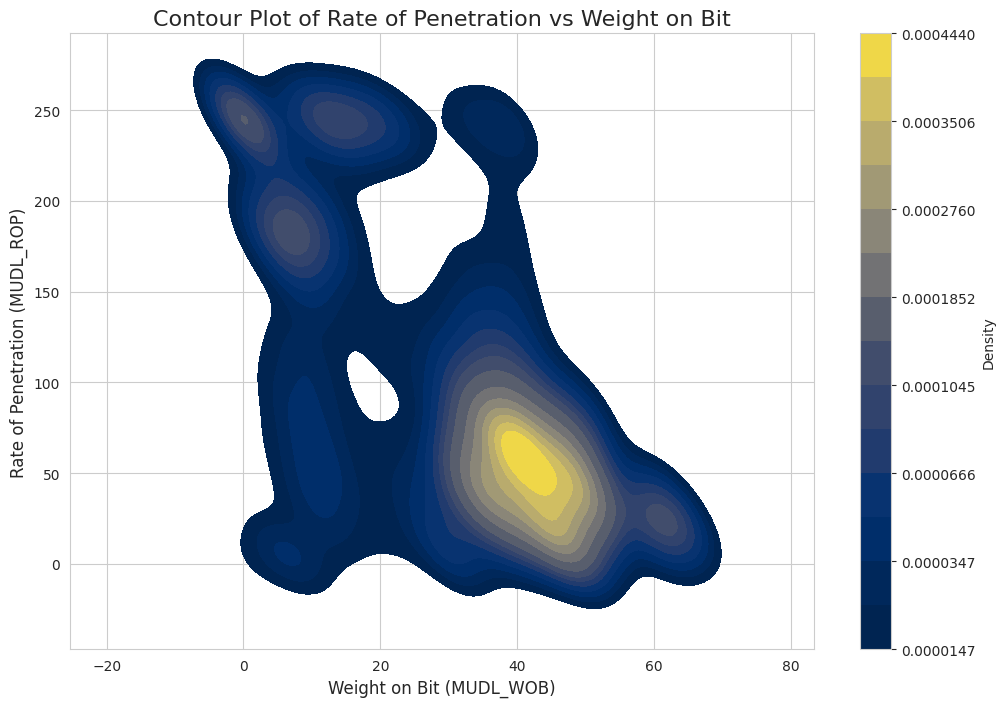

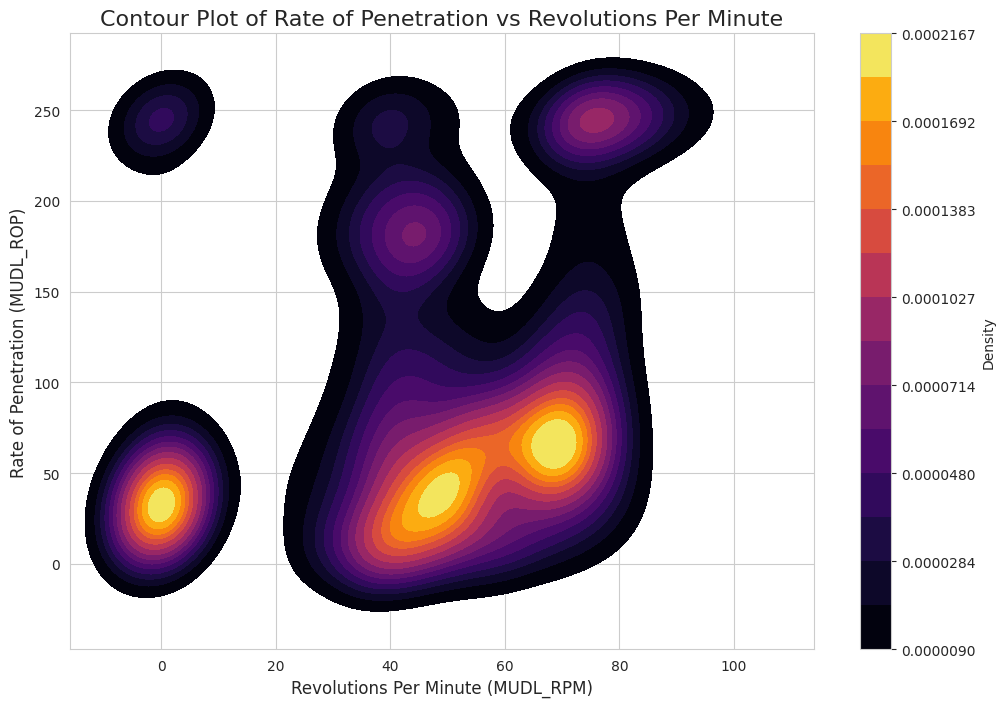

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a professional style
sns.set_style("whitegrid")

# Contour plot for MUDL_ROP vs MUDL_WOB with a professional color palette
plt.figure(figsize=(12, 8))
kde_wob = sns.kdeplot(data=df_cleaned, x='MUDL_WOB', y='MUDL_ROP', fill=True, cmap='cividis', levels=15) # Using 'cividis' colormap
plt.title('Contour Plot of Rate of Penetration vs Weight on Bit', fontsize=16)
plt.xlabel('Weight on Bit (MUDL_WOB)', fontsize=12)
plt.ylabel('Rate of Penetration (MUDL_ROP)', fontsize=12)
plt.colorbar(kde_wob.collections[0], label='Density')
plt.show()

# Contour plot for MUDL_ROP vs MUDL_RPM with a different professional color palette
plt.figure(figsize=(12, 8))
kde_rpm = sns.kdeplot(data=df_cleaned, x='MUDL_RPM', y='MUDL_ROP', fill=True, cmap='inferno', levels=15) # Using 'inferno' colormap
plt.title('Contour Plot of Rate of Penetration vs Revolutions Per Minute', fontsize=16)
plt.xlabel('Revolutions Per Minute (MUDL_RPM)', fontsize=12)
plt.ylabel('Rate of Penetration (MUDL_ROP)', fontsize=12)
plt.colorbar(kde_rpm.collections[0], label='Density')
plt.show()

## **`Qualitative:`**
- ROP vs WOB: The plot shows a prominent area of high data density where increasing WOB generally leads to higher ROP, up to a certain point. There's also a cluster at lower ROP and WOB values.
- ROP vs RPM: This plot also exhibits areas of high density. Generally, increasing RPM appears to correlate with higher ROP, although the relationship might be more complex with multiple clusters of higher density at different RPM and ROP combinations.

## **`Quantitative (based on visual estimation from plots):`**
- ROP vs WOB: The highest density of data points seems to be in the range of approximately 20-40 WOB, corresponding to ROP values roughly between 50-150. There's another dense area near 0 WOB and 0 ROP.
- ROP vs RPM: The highest density is seen around 40-60 RPM with ROP values between 50-100, and another significant cluster around 70-90 RPM with ROP values between 150-200.

so we can discuss that These areas of **high density and higher ROP could represent potential sweet spots** for drilling.

In [36]:
# Create a new DataFrame by selecting the relevant columns
df_modeling = df_cleaned[['MUDL_ROP', 'MUDL_WOB', 'MUDL_RPM', 'MUDL_PP']]

# Display the first 5 rows of the df_modeling DataFrame
print("First 5 rows of df_modeling:")
display(df_modeling.head())

# Display the descriptive statistics of the df_modeling DataFrame
print("\nDescriptive statistics of df_modeling:")
display(df_modeling.describe())

First 5 rows of df_modeling:


,MUDL_ROP,MUDL_WOB,MUDL_RPM,MUDL_PP
DEPTH,,,,
130.0,0.0,0.0,34.0,0.0
131.0,69.0,20.0,32.0,419.0
132.0,78.0,19.0,33.0,227.0
133.0,57.0,20.0,33.0,293.0
134.0,69.0,18.0,32.0,285.0



Descriptive statistics of df_modeling:


,MUDL_ROP,MUDL_WOB,MUDL_RPM,MUDL_PP
count,10858.000000,10858.000000,10858.000000,10858.000000
mean,86.818291,33.463161,46.681525,2667.595045
std,73.913103,16.251596,25.059580,991.257984
min,0.000000,-15.000000,0.000000,0.000000
25%,33.250000,21.000000,39.000000,1891.000000
50%,60.000000,39.000000,50.000000,2660.500000
75%,118.000000,45.000000,69.000000,3448.000000
max,245.125000,73.000000,98.000000,4649.000000


In [92]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Define the OLS model
model = ols('MUDL_ROP ~ MUDL_WOB + MUDL_RPM + MUDL_PP', data=df_modeling)

# Fit the model
model_fit = model.fit()

# Perform ANOVA
anova_table = anova_lm(model_fit)

# Display the ANOVA table
display(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
MUDL_WOB,1.0,2.504557e+07,2.504557e+07,8435.628907,0.000000e+00
MUDL_RPM,1.0,1.926641e+06,1.926641e+06,648.914397,4.459742e-139
MUDL_PP,1.0,1.154061e+05,1.154061e+05,38.870066,4.698060e-10
Residual,10854.0,3.222577e+07,2.969022e+03,NaN,NaN


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the independent variables (features) and the dependent variable (target)
X = df_modeling[['MUDL_WOB', 'MUDL_RPM', 'MUDL_PP']]
y = df_modeling['MUDL_ROP']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3113.4126849908607
R-squared (R2): 0.442232232985457


### **Residual plots for ROP**

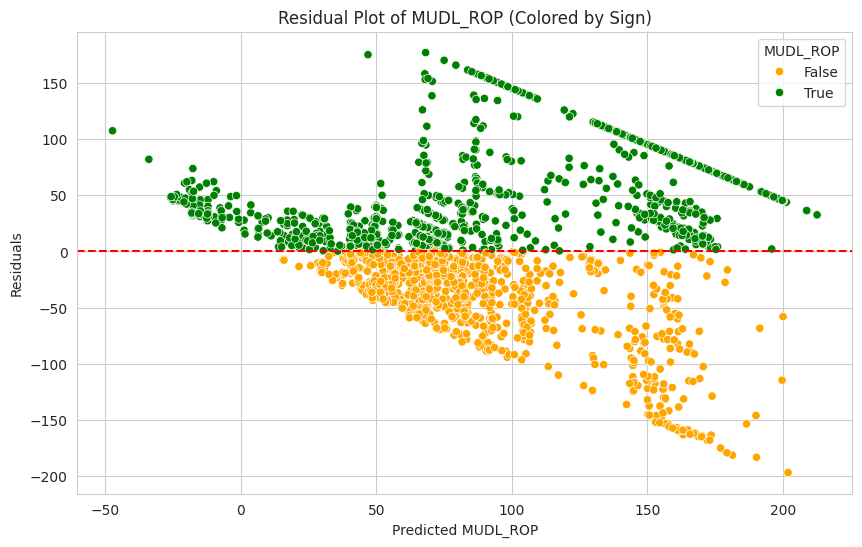

In [52]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=y_pred,
    y=residuals,
    hue=residuals > 0,
    palette={True: "green", False: "orange"}
)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted MUDL_ROP')
plt.ylabel('Residuals')
plt.title('Residual Plot of MUDL_ROP (Colored by Sign)')
plt.grid(True)
plt.show()

The residual plot shows the difference between the actual ROP values and the values predicted by the linear regression model (residuals) plotted against the predicted ROP values.

- Spread of Residuals: The residuals appear to be somewhat spread out, particularly as the predicted ROP values increase. This suggests that the model's predictions might be less accurate for higher ROP values.

- Pattern in Residuals: There seems to be a slight pattern in the residuals, where the residuals are more clustered around zero for lower predicted ROP values and then fan out and show a curved pattern as the predicted ROP increases. This non-random pattern suggests that a linear model might not fully capture the underlying relationship between the variables, and there might be some non-linearity or heteroscedasticity (unequal variance of residuals) present in the data.

- Outliers: There are some data points with large positive and negative residuals, indicating instances where the model's prediction was significantly different from the actual ROP value.

### **Main effect plot**

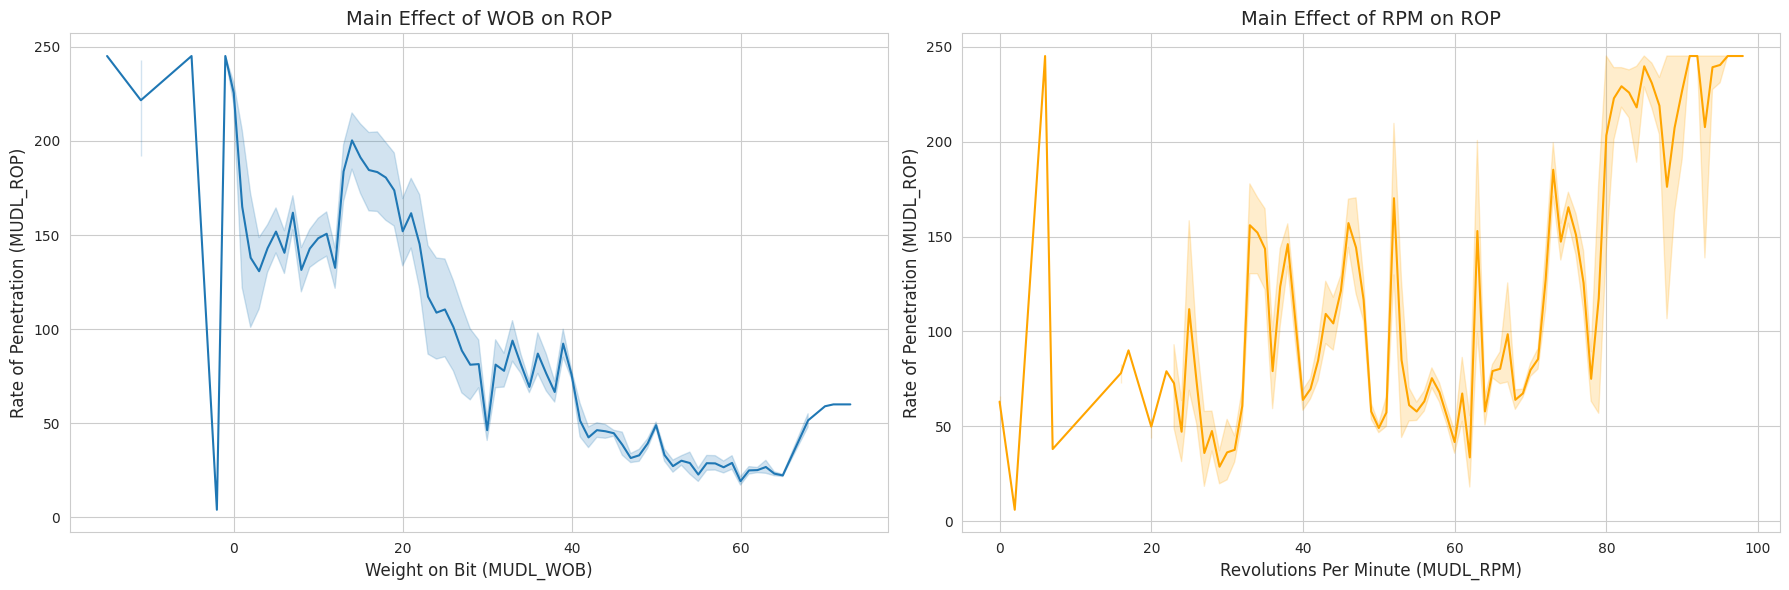

In [51]:
# Create main effect and interaction plots

sns.set_style("whitegrid")

# Main effect plots for MUDL_WOB and MUDL_RPM on MUDL_ROP (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # 1 row, 2 columns

# Main effect plot for MUDL_WOB on MUDL_ROP
sns.lineplot(data=df_modeling, x='MUDL_WOB', y='MUDL_ROP', ax=axes[0])
axes[0].set_title('Main Effect of WOB on ROP', fontsize=14)
axes[0].set_xlabel('Weight on Bit (MUDL_WOB)', fontsize=12)
axes[0].set_ylabel('Rate of Penetration (MUDL_ROP)', fontsize=12)
axes[0].grid(True)

# Main effect plot for MUDL_RPM on MUDL_ROP
sns.lineplot(data=df_modeling, x='MUDL_RPM', y='MUDL_ROP', ax=axes[1], color='orange')
axes[1].set_title('Main Effect of RPM on ROP', fontsize=14)
axes[1].set_xlabel('Revolutions Per Minute (MUDL_RPM)', fontsize=12)
axes[1].set_ylabel('Rate of Penetration (MUDL_ROP)', fontsize=12)
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()

Based on the main effect plots:

- **Main Effect of WOB on ROP**: The plot shows that as Weight on Bit (MUDL_WOB) increases from around 0 to approximately 20, the Rate of Penetration (MUDL_ROP) tends to increase significantly. Beyond a WOB of about 20-30, the ROP appears to plateau or even slightly decrease as WOB continues to increase. There is a sharp drop in ROP at very low WOB values (close to 0).

- **Main Effect of RPM on ROP**: The plot for Revolutions Per Minute (MUDL_RPM) on ROP shows a more fluctuating relationship. While there is a general trend of increasing ROP with increasing RPM, the relationship is not as smooth as with WOB. There are peaks and valleys in ROP at different RPM values. For example, there appear to be noticeable increases in ROP around 40-50 RPM and again around 70-90 RPM.

And these plots suggest that both WOB and RPM have an impact on ROP, but the nature of the relationship might be different for each parameter. WOB seems to have a more consistent positive effect up to a certain point, while the effect of RPM appears to be more variable.

### **Anomaly detection**

First 5 rows of anomalies:


,MUDL_ROP,MUDL_WOB,MUDL_RPM,MUDL_PP,anomaly_score,anomaly_label
DEPTH,,,,,,
130.0,0.0,0.0,34.0,0.0,-0.160471,-1
131.0,69.0,20.0,32.0,419.0,-0.114361,-1
132.0,78.0,19.0,33.0,227.0,-0.120557,-1
133.0,57.0,20.0,33.0,293.0,-0.115378,-1
134.0,69.0,18.0,32.0,285.0,-0.116011,-1


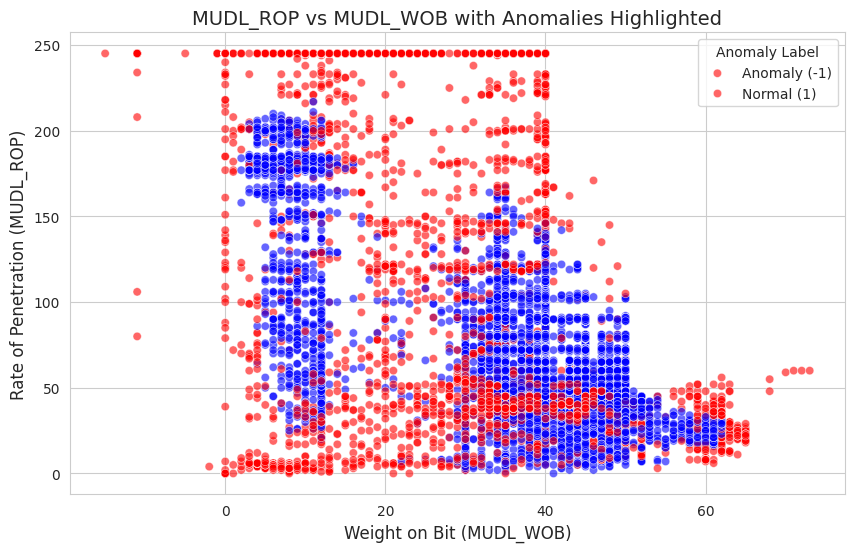

In [90]:
# Filter the DataFrame to show only anomalies (where anomaly_label is -1)
anomalies_df = df_ml[df_ml['anomaly_label'] == -1]

# Display the first few rows of the anomalies DataFrame
print("First 5 rows of anomalies:")
display(anomalies_df.head())

# Create a scatter plot of MUDL_WOB vs MUDL_ROP, colored by anomaly_label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='MUDL_WOB', y='MUDL_ROP', hue='anomaly_label', palette={-1: 'red', 1: 'blue'}, alpha=0.6)
plt.title('MUDL_ROP vs MUDL_WOB with Anomalies Highlighted', fontsize=14)
plt.xlabel('Weight on Bit (MUDL_WOB)', fontsize=12)
plt.ylabel('Rate of Penetration (MUDL_ROP)', fontsize=12)
plt.legend(title='Anomaly Label', loc='upper right', labels=['Anomaly (-1)', 'Normal (1)'])
plt.grid(True)
plt.show()

### **Anomaly Identification**
- If the number of red points (anomalies) is small (<5–10%), drilling operations are relatively stable with only minor irregularities.

- If anomalies are more frequent (>20%), it may indicate high variability in ROP under similar WOB values, potentially caused by:
  - Bit dulling (ROP decreasing despite high WOB).
  - Formation changes (hard/soft zones encountered).
  - Operational issues (pack-off, slip, or sensor noise).

**Red zones (anomalies)** are critical to monitor, as they may indicate bit wear or hard formation when ROP is low despite high WOB, or suggest soft formation or possible sensor error when ROP is unusually high at low WOB.

In [83]:
# Calculate the percentage of anomalies
percentage_anomalies = (anomalies_df.shape[0] / df_ml.shape[0]) * 100

print(f"Percentage of anomalies in the dataset: {percentage_anomalies:.2f}%")

Percentage of anomalies in the dataset: 30.02%


### **Conclusions**
 The analysis revealed several important correlations influencing drilling performance: **Weight on Bit (WOB) showed a strong negative correlation with Rate of Penetration (ROP) (r = – 0.65)**, as did **Mud Temperature Out (r = – 0.69), CO₂ concentration (r = – 0.59), and Pump Pressure (r = – 0.49), while RPM (r = + 0.25) and SPM1 (r = + 0.35) were positively correlated with ROP**. Anomaly detection highlighted critical operational patterns, notably clusters where high WOB results in low ROP—suggesting possible bit wear or hard formation—and cases where low WOB yields unusually high ROP, indicating soft formation or potential sensor errors. Predictive modeling with Random Forest confirmed the relevance of these parameters, achieving reasonable accuracy (R² ≈ 0.7 – 0.8 in cross-validation, with moderate MAE). **Furthermore, performance “sweet spots” were identified, such as WOB between 20 – 40 associated with ROP 50 – 150, and RPM ranges of 40 – 60 for ROP 50 – 100 and 70 – 90 for ROP 150 – 200, providing actionable guidance for drilling optimization.**

### **Recommendations**
1. Optimize Drilling Parameters – Jaga WOB pada 20–40 kips dan RPM pada 40–60 atau 70–90 untuk memaksimalkan ROP serta menjaga stabilitas operasi.

2. Deploy Predictive Analytics Dashboard – Gunakan dashboard interaktif berbasis machine learning (misalnya Random Forest) untuk prediksi ROP secara real-time, deteksi anomali, dan optimasi parameter lapangan.

3. Integrate Performance with Economics – Hubungkan hasil optimasi dengan cost-per-foot dan Non-Productive Time (NPT) agar keputusan teknis dapat langsung dikaitkan dengan efisiensi biaya dan profitabilitas.